In [4]:
library(keras)
library(lattice)
library(ggplot2)
library(caret)

In [5]:
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [6]:
dim(iris)

[1] 150   5

In [7]:
iris[0:5, 0:5]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [8]:
iris[,5]

[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor versicolor versicolor versicolor versicolor
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  virginica 
[103] virginica  virginica  virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  virginica 
[121] virginica  virginica  virginica  virginica  virginica  virginica 
[127] virginica  virginica  virginica  virginica  virginica  virginica 
[133] virginica  virginica  virginica  virginica  virginica  virginica 
[139] virginica  virginica  virginica  virginica  virginica  virginica 
[145] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [9]:
index<-createDataPartition(iris$Species,p=0.7,list=F)
Train_Features <- data.matrix(iris[index,-5])
Train_Labels <- iris[index,5]
Test_Features <- data.matrix(iris[-index,-5])
Test_Labels <- iris[-index,5]

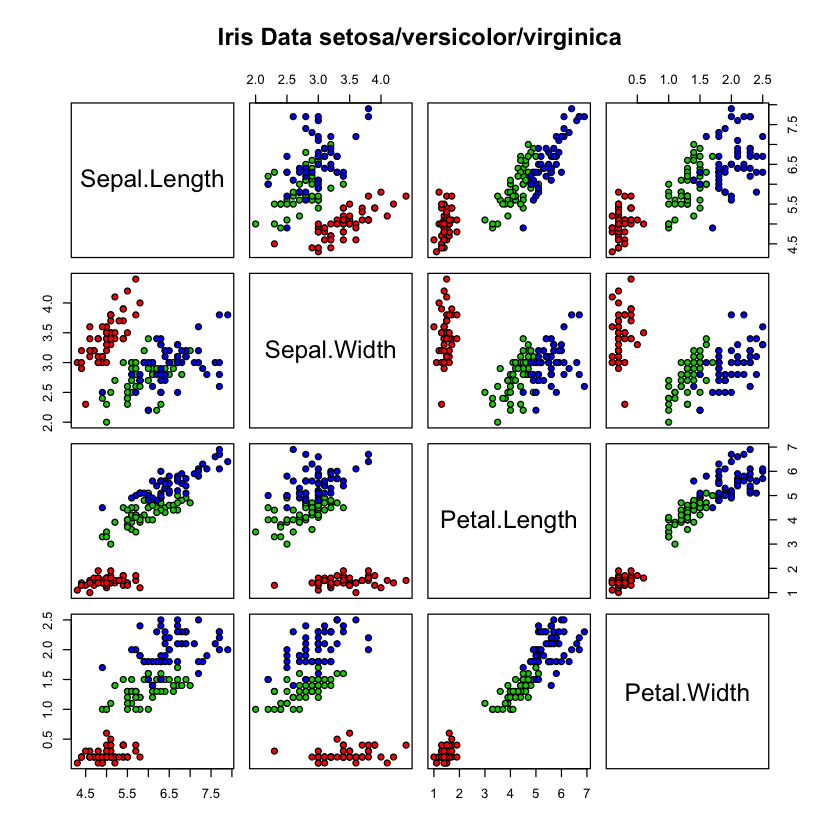

In [10]:
pairs(iris[1:4], main = "Iris Data setosa/versicolor/virginica", pch = 21, bg = c("red", "green3", "blue")[unclass(iris$Species)])

In [11]:
to_categorical(as.numeric(Train_Labels))[,c(-1)] -> Train_Labels
to_categorical(as.numeric(Test_Labels))[,c(-1)] -> Test_Labels

In [12]:
summary(Train_Labels)

       V1               V2               V3        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.3333   Mean   :0.3333   Mean   :0.3333  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  

In [13]:
str(Train_Features)

 num [1:105, 1:4] 4.9 4.7 5.4 5 4.9 5.4 4.8 4.8 4.3 5.8 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:105] "2" "3" "6" "8" ...
  ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"


In [14]:
as.matrix(apply(Train_Features, 2, function(x) (x-min(x))/(max(x) - min(x)))) -> Train_Features
as.matrix(apply(Test_Features, 2, function(x) (x-min(x))/(max(x) - min(x)))) -> Test_Features

In [15]:
model <- keras_model_sequential()

In [16]:
model %>%
    layer_dense(units=10,activation = "relu",input_shape = ncol(Train_Features)) %>%
    layer_dense(units = 10, activation = "relu") %>%
    layer_dense(units = 3, activation = "softmax")

In [17]:
summary(model)

Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense (Dense)                       (None, 10)                      50          
________________________________________________________________________________
dense_1 (Dense)                     (None, 10)                      110         
________________________________________________________________________________
dense_2 (Dense)                     (None, 3)                       33          
Total params: 193
Trainable params: 193
Non-trainable params: 0
________________________________________________________________________________


In [18]:
model %>% compile(loss = "categorical_crossentropy",
  optimizer = optimizer_adagrad(),
  metrics = c('accuracy')
)

In [19]:
history <- model %>% fit(Train_Features,Train_Labels,validation_split = 0.10,epochs=300,batch_size = 5,shuffle = T)

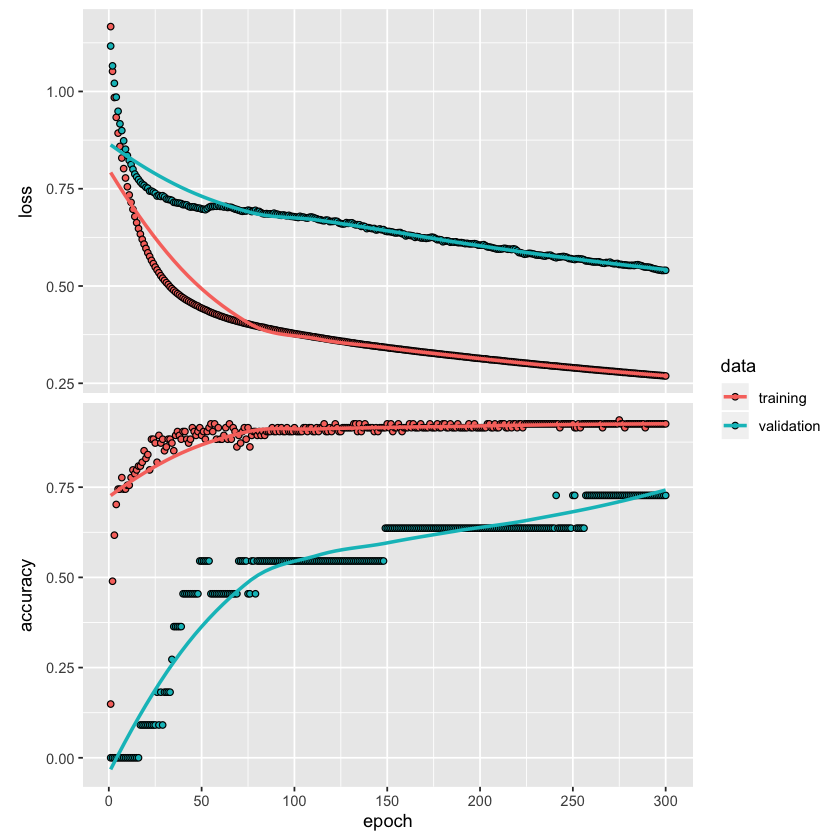

In [20]:
plot(history)

In [21]:
model %>% evaluate(Test_Features,Test_Labels)

$loss
[1] 0.2851193

$accuracy
[1] 0.9111111